# Muhammad Asad Manzoor,21032326
# Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data 

In [2]:
countries=["Netherlands", "China", "France", "Denmark", "India", "Italy", "World"]
indic=["Electric power consumption (kWh per capita)", "Renewable energy consumption (% of total final energy consumption)"]

In [3]:
def dataformat(data):
    datacols=data.columns
    dataidx=data.index
    dataarr=np.array(data.values,int)
    data=pd.DataFrame(dataarr,columns=datacols,index=dataidx)
    return data

In [4]:
def df_reader(dfname):
    wb=open(dfname,"r+").read()     # read wb in WB format
    wb=wb[85:]
    df=open("wb.csv","w+").write(wb)    # store temp wb
    df=pd.read_csv("wb.csv")
    df=df.fillna(df.mean())
    years=df.columns.tolist()[4:-1]    # take year columns
    df=df[(df['Indicator Name']==indic[0])|((df['Indicator Name']==indic[1]))]    # filter wb by indicator
    fltr=df['Country Name'].isin(countries)
    df=df[fltr]
    cntr=df['Country Name'].tolist()
    indx=df['Indicator Name'].tolist()
    d1=[]
    for i in range(len(indx)):
        d1.append(cntr[i])    # craeting new column by conbining country and indicator
    df.insert(4,"Countries",d1)
    df1=df.T.iloc[4:][:-1]
    remcols=['Unnamed: 65','Country Code','Indicator Code','Countries']
    # drop unnecessary features
    df=df.reset_index(drop=True).drop(remcols,axis=1)
    df1.columns=df1.iloc[0]
    df1=df1.iloc[1:]
    df1['Year']=years
    df1=df1.set_index("Year")
    return df,df1  

In [5]:
df,df1=df_reader("API_19_DS2_en_csv_v2_3931355.csv")

In [6]:
df=df.drop('Indicator Name',axis=1)
df.head()   # Data with Year Column

Country Name          1960          1961          1962          1963  \
0        China  2.015940e+07  1.476890e+07  1.488896e+07  1.642074e+07   
1        China  2.015940e+07  1.476890e+07  1.488896e+07  1.642074e+07   
2      Denmark  1.089614e+03  1.192405e+03  1.355932e+03  1.497924e+03   
3      Denmark  2.015940e+07  1.476890e+07  1.488896e+07  1.642074e+07   
4       France  1.462710e+03  1.550385e+03  1.654216e+03  1.751161e+03   

           1964          1965          1966          1967          1968  ...  \
0  1.688664e+07  1.753013e+07  1.965494e+07  1.971973e+07  2.183690e+07  ...   
1  1.688664e+07  1.753013e+07  1.965494e+07  1.971973e+07  2.183690e+07  ...   
2  1.624499e+03  1.818655e+03  1.984416e+03  2.128489e+03  2.339214e+03  ...   
3  1.688664e+07  1.753013e+07  1.965494e+07  1.971973e+07  2.183690e+07  ...   
4  1.896890e+03  1.988337e+03  2.095697e+03  2.186790e+03  2.267667e+03  ...   

          2011         2012         2013         2014          2015  \
0  3295.784868  3466.019539  3757.185088  3905.317598  1.375829e+09   
1    11.338200    11.536700    11.522000    12.061400  1.224530e+01   
2  6165.973620  6038.552307  6039.432000  5858.801536  1.375829e+09   
3    23.809799    26.912001    27.097799    30.228399  3.297780e+01   
4  7232.978684  7363.423235  7367.843768  6939.943525  1.375829e+09   

           2016          2017          2018          2019          2020  
0  1.352424e+07  1.553889e+07  1.709443e+07  3.435867e+07  4.320922e+07  
1  1.258970e+01  1.286360e+01  1.312380e+01  3.435867e+07  4.320922e+07  
2  1.352424e+07  1.553889e+07  1.709443e+07  3.435867e+07  4.320922e+07  
3  3.212960e+01  3.550570e+01  3.532870e+01  3.435867e+07  4.320922e+07  
4  1.352424e+07  1.553889e+07  1.709443e+07  3.435867e+07  4.320922e+07  

[5 rows x 62 columns]

In [7]:
df1.head()   # Data with country column

Countries            China            China      Denmark          Denmark  \
Year                                                                        
1960       20159401.163406  20159401.163406    1089.6141  20159401.163406   
1961       14768896.898304  14768896.898304  1192.405296  14768896.898304   
1962       14888963.885678  14888963.885678   1355.93162  14888963.885678   
1963        16420743.87221   16420743.87221  1497.924104   16420743.87221   
1964       16886643.335033  16886643.335033  1624.498737  16886643.335033   

Countries       France           France            India            India  \
Year                                                                        
1960       1462.709801  20159401.163406  20159401.163406  20159401.163406   
1961       1550.384939  14768896.898304  14768896.898304  14768896.898304   
1962       1654.215638  14888963.885678  14888963.885678  14888963.885678   
1963       1751.161074   16420743.87221   16420743.87221   16420743.87221   
1964       1896.889911  16886643.335033  16886643.335033  16886643.335033   

Countries        Italy            Italy  Netherlands      Netherlands  \
Year                                                                    
1960        975.025747  20159401.163406  1353.399443  20159401.163406   
1961       1046.415105  14768896.898304   1421.03353  14768896.898304   
1962       1143.605129  14888963.885678   1528.50037  14888963.885678   
1963       1266.350581   16420743.87221  1647.505935   16420743.87221   
1964       1353.314491  16886643.335033  1778.740542  16886643.335033   

Countries            World            World  
Year                                         
1960       20159401.163406  20159401.163406  
1961       14768896.898304  14768896.898304  
1962       14888963.885678  14888963.885678  
1963        16420743.87221   16420743.87221  
1964       16886643.335033  16886643.335033

# Data Analysis

In [22]:
electricmx,renewmx=[],[]
for i in range(len(countries)):
    tempdf=df[df['Country Name']==countries[i]]
    electricmx.append(round(tempdf.iloc[0,1:].max(),2))
    renewmx.append(round(tempdf.iloc[1,1:].max(),2))
print("----------------------------------------------------------------")
print("      Statistics for Electric power consumption (Max)")
print("----------------------------------------------------------------")
for i in range(len(renew)):
    print("{} has the Maximum Electric power consumption of {}".format(countries[i],renew[i]))
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("      Statistics for Renewable energy consumption (Max)")
print("----------------------------------------------------------------")
for i in range(len(electric)):
    print("{} has the Maximum Renewable energy consumption of {}".format(countries[i],electric[i]))
print("----------------------------------------------------------------")

----------------------------------------------------------------
      Statistics for Electric power consumption (Max)
----------------------------------------------------------------
Netherlands has the Maximum Electric power consumption of 19452424.46
China has the Maximum Electric power consumption of 19452433.29
France has the Maximum Electric power consumption of 19452428.21
Denmark has the Maximum Electric power consumption of 19452431.03
India has the Maximum Electric power consumption of 19452445.26
Italy has the Maximum Electric power consumption of 19452427.26
World has the Maximum Electric power consumption of 20209111.93
----------------------------------------------------------------
----------------------------------------------------------------
      Statistics for Renewable energy consumption (Max)
----------------------------------------------------------------
Netherlands has the Maximum Renewable energy consumption of 24587156.78
China has the Maximum Renewable ener

In [26]:
electricmin,renewmin=[],[]
for i in range(len(countries)):
    tempdf=df[df['Country Name']==countries[i]]
    electricmin.append(round(tempdf.iloc[0,1:].min(),2))
    renewmin.append(round(tempdf.iloc[1,1:].min(),2))
print("----------------------------------------------------------------")
print("      Statistics for Electric power consumption (Min)")
print("----------------------------------------------------------------")
for i in range(len(renew)):
    print("{} has the Minimum  (MinElectric power consumption of {}".format(countries[i],renew[i]))
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("      Statistics for Renewable energy consumption (Min)")
print("----------------------------------------------------------------")
for i in range(len(electric)):
    print("{} has the Minimum  (MinRenewable energy consumption of {}".format(countries[i],electric[i]))
print("----------------------------------------------------------------")

----------------------------------------------------------------
      Statistics for Electric power consumption (Min)
----------------------------------------------------------------
Netherlands has the Minimum  (MinElectric power consumption of 19452424.46
China has the Minimum  (MinElectric power consumption of 19452433.29
France has the Minimum  (MinElectric power consumption of 19452428.21
Denmark has the Minimum  (MinElectric power consumption of 19452431.03
India has the Minimum  (MinElectric power consumption of 19452445.26
Italy has the Minimum  (MinElectric power consumption of 19452427.26
World has the Minimum  (MinElectric power consumption of 20209111.93
----------------------------------------------------------------
----------------------------------------------------------------
      Statistics for Renewable energy consumption (Min)
----------------------------------------------------------------
Netherlands has the Minimum  (MinRenewable energy consumption of 24587156

In [24]:
electric,renew=[],[]
for i in range(len(countries)):
    tempdf=df[df['Country Name']==countries[i]]
    electric.append(round(tempdf.iloc[0,1:].mean(),2))
    renew.append(round(tempdf.iloc[1,1:].mean(),2))
print("----------------------------------------------------------------")
print("      Statistics for Electric power consumption(Average)")
print("----------------------------------------------------------------")
for i in range(len(renew)):
    print("{} has the Average Electric power consumption of {}".format(countries[i],renew[i]))
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("      Statistics for Renewable energy consumption(Average)")
print("----------------------------------------------------------------")
for i in range(len(electric)):
    print("{} has the Average Renewable energy consumption of {}".format(countries[i],electric[i]))
print("----------------------------------------------------------------")

----------------------------------------------------------------
      Statistics for Electric power consumption(Average)
----------------------------------------------------------------
Netherlands has the Average Electric power consumption of 19452424.46
China has the Average Electric power consumption of 19452433.29
France has the Average Electric power consumption of 19452428.21
Denmark has the Average Electric power consumption of 19452431.03
India has the Average Electric power consumption of 19452445.26
Italy has the Average Electric power consumption of 19452427.26
World has the Average Electric power consumption of 20209111.93
----------------------------------------------------------------
----------------------------------------------------------------
      Statistics for Renewable energy consumption(Average)
----------------------------------------------------------------
Netherlands has the Average Renewable energy consumption of 24587156.78
China has the Average Renewabl

In [25]:
dfst=pd.DataFrame({
    "Country":countries,
    "Electric power consumption":electric,
    "Renewable energy consumption":renew,
    "Electric power consumption(Max)":electricmx,
    "Renewable energy consumption(Max)":renewmx
})
dfst=dfst.sort_values(by="Electric power consumption")
dfst=dfst.set_index("Country")
dfst

Electric power consumption  Renewable energy consumption  \
Country                                                                 
Italy                       24586167.84                   19452427.26   
Netherlands                 24587156.78                   19452424.46   
Denmark                     24587213.33                   19452431.03   
France                      24587475.32                   19452428.21   
India                       27977436.24                   19452445.26   
China                       27977973.82                   19452433.29   
World                       27978719.21                   20209111.93   

             Electric power consumption(Max)  \
Country                                        
Italy                           1.375829e+09   
Netherlands                     1.375829e+09   
Denmark                         1.375829e+09   
France                          1.375829e+09   
India                           1.375829e+09   
China                           1.375829e+09   
World                           1.375829e+09   

             Renewable energy consumption(Max)  
Country                                         
Italy                             1.274638e+08  
Netherlands                       1.274638e+08  
Denmark                           1.274638e+08  
France                            1.274638e+08  
India                             1.274638e+08  
China                             1.274638e+08  
World                             1.274638e+08

In [33]:
dfst.iloc[:,0][:-1].sort_values().plot(kind="barh",color="y",figsize=(6,3))
plt.title("Electric power consumption by Country",fontsize=18,color="y")
plt.xlabel("Country",fontsize=14,color="y")
plt.ylabel("Electric power consumption",fontsize=14,color="y")
plt.grid()
plt.show()

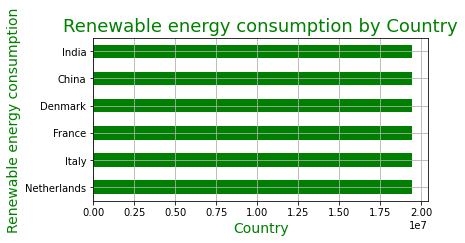

In [34]:
dfst.iloc[:,1][:-1].sort_values().plot(kind="barh",color="g",figsize=(6,3))
plt.title("Renewable energy consumption by Country",fontsize=18,color="g")
plt.xlabel("Country",fontsize=14,color="g")
plt.ylabel("Renewable energy consumption",fontsize=14,color="g")
plt.grid()
plt.show()

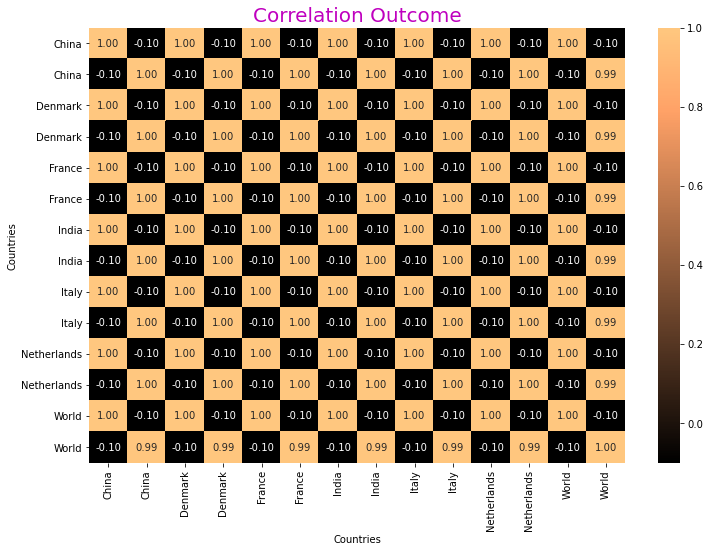

In [12]:
df2=dataformat(df1)
plt.figure(figsize=(12,8))
plt.title("Correlation Outcome",fontsize=20,color="m")
sns.heatmap(df2.corr(),annot=True,fmt="0.2f",cmap="copper")
plt.show()

In [13]:
df2.head(2)

Countries     China     China  Denmark   Denmark  France    France     India  \
Year                                                                           
1960       20159401  20159401     1089  20159401    1462  20159401  20159401   
1961       14768896  14768896     1192  14768896    1550  14768896  14768896   

Countries     India  Italy     Italy  Netherlands  Netherlands     World  \
Year                                                                       
1960       20159401    975  20159401         1353     20159401  20159401   
1961       14768896   1046  14768896         1421     14768896  14768896   

Countries     World  
Year                 
1960       20159401  
1961       14768896

In [14]:
df2.iloc[:,0+1]

Year
1960    20159401
1961    14768896
1962    14888963
1963    16420743
1964    16886643
          ...   
2016          12
2017          12
2018          13
2019    34358666
2020    43209216
Name: China, Length: 61, dtype: int32

In [15]:
i,j=0,1
m=0
for x in range(len(df2.columns)):
    try:
        cr=np.corrcoef(df2.iloc[:,i],df2.iloc[:,j])[0,1]
        print("==============================================================================")
        print("Correlation for Electric power consumption and Renewable energy consumption")
        print("Country: {}".format(countries[m]))
        print(cr)
        print("==============================================================================")
        i+=2
        j+=2
        m+=1
    except:
        pass

Correlation for Electric power consumption and Renewable energy consumption
Country: Netherlands
-0.09640245297814386
Correlation for Electric power consumption and Renewable energy consumption
Country: China
-0.09605347074904069
Correlation for Electric power consumption and Renewable energy consumption
Country: France
-0.09605503716213841
Correlation for Electric power consumption and Renewable energy consumption
Country: Denmark
-0.09640057498807485
Correlation for Electric power consumption and Renewable energy consumption
Country: India
-0.09605464615322407
Correlation for Electric power consumption and Renewable energy consumption
Country: Italy
-0.09605485817582095
Correlation for Electric power consumption and Renewable energy consumption
Country: World
-0.09992866505600309
